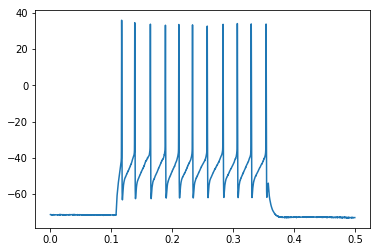

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import pyabf
import seaborn as sns
from scipy.signal import find_peaks
import numpy as np
filepath = '/Volumes/brain_slice/Tsai/04-15-19_PV-cre-tdTOM-GCaM6f_P52/Concatenate000.abf'
abf = pyabf.ABF(filepath)
abf.setSweep(1)
plt.plot(abf.sweepX, abf.sweepY)
plt.show()



In [15]:
y = []
for sweep in abf.sweepList:
    abf.setSweep(sweep,channel=0)
    y.append(abf.sweepY)
y = np.stack(y)
x = abf.sweepX

In [16]:
#find spike method 2 -> better
Spikes = []
for sweep in abf.sweepList:
    abf.setSweep(sweep,channel=0)
    peak_time, _ = find_peaks(abf.sweepY, height=0)
    Spikes.append(peak_time)
       

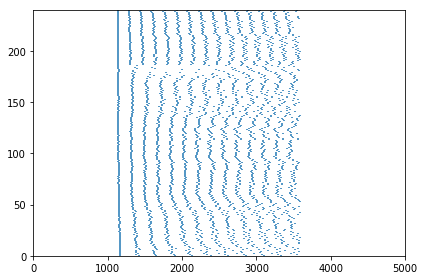

In [17]:
# rastor plot
plt.eventplot(Spikes)
plt.ylim((0,len(abf.sweepList)))
plt.xlim((0,5000))
plt.tight_layout()

Text(0.5, 0, 'Time (sec)')

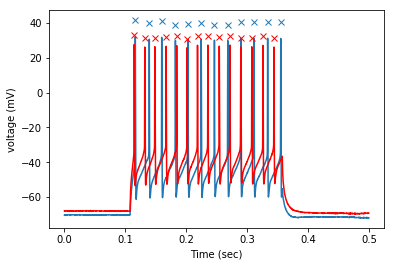

In [18]:
sweep1 = 20
sweep2 =110

plt.plot(x,y[sweep1])
plt.plot(Spikes[sweep1]/10000, y[sweep1,Spikes[sweep1]]*1.3, "x", color ='#1f77b4')
plt.plot(x,y[sweep2], 'red')
plt.plot(Spikes[sweep2]/10000, y[sweep2,Spikes[sweep2]]*1.2, "x", color ='red')

plt.ylabel("voltage (mV)")
plt.xlabel("Time (sec)")

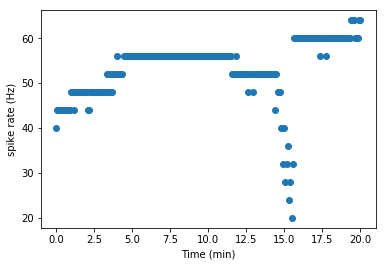

In [19]:
# allocate numbers of spikes in each sweep
SpikeNumber = []
for i in abf.sweepList:
    spkn = len(Spikes[i])
    SpikeNumber.append(spkn*4) # 4 is the number to convert spike number to rate (# of spikes/250ms current injection) 

#plot time series    
xi = [i for i in np.linspace(0, len(SpikeNumber)*5/60,len(SpikeNumber))]
plt.ylabel("spike rate (Hz)")
plt.xlabel("Time (min)")
plt.plot(xi,SpikeNumber,"o")



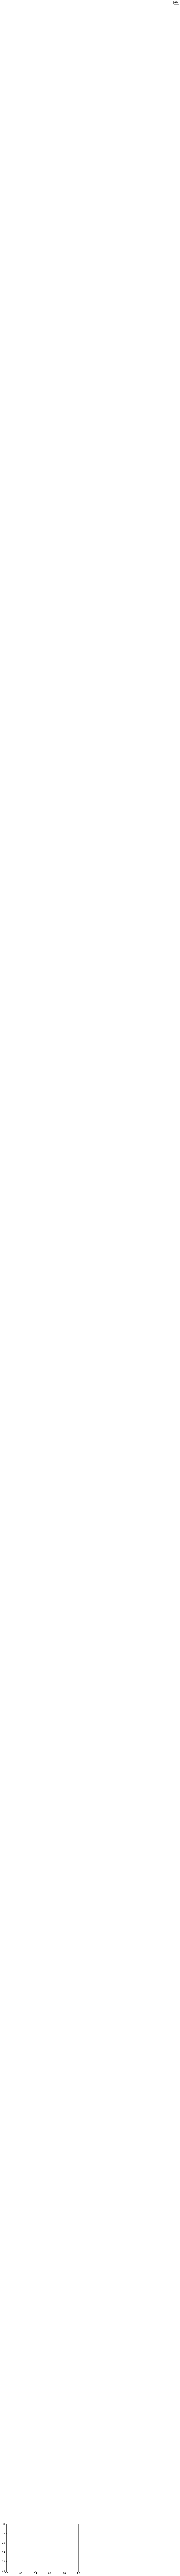

In [20]:

#annotation
an1 = plt.annotate("DMSO", xy=(2, 55), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))
an2 = plt.annotate("GSK", xy=(4,0.5), xycoords=an1, # (1,0.5) of the an1's bbox
                  xytext=(4,0.5), textcoords="offset points",
                  va="center", ha="left",
                  bbox=dict(boxstyle="round", fc="w"))#,
                  #arrowprops=dict(arrowstyle="->"))